# load dataset and screen obvious outliers

In [2]:
%pylab inline
%matplotlib inline
import pandas as pd

store = pd.HDFStore('store.h5')
feats = store['feats']
labs = store['labs']

# sel=(labs.F!=0)
# labF = labs[sel].F
# featsF = feats[sel]

# sel2=(labs['T']!=0)
# labT = labs[sel2]['T']
# featsT = feats[sel2]

labV = labs.V
featsV = feats

Populating the interactive namespace from numpy and matplotlib


- variable SA,SB,SC,SD should be deleted

# preprocessing the data

In [6]:
from sklearn import preprocessing
import numpy as np

# sfeatsF = pd.DataFrame(preprocessing.scale(featsF))
# sfeatsT = pd.DataFrame(preprocessing.scale(featsT))
sfeatsV = pd.DataFrame(preprocessing.scale(featsV))

X=sfeatsV
Y=labV
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(sfeatsV, labV, test_size=0.33, random_state=42)
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(44264, 81) (21803, 81) (44264,) (21803,)


$score = 1−\sum(y_{pred}−y_{true})^2/ \sum(y_{true}−y_{mean})^2$


In [7]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.5)
lasso.fit(X_train,Y_train)

lowly_correlated= (lasso.coef_==0)
print 'deleted variables:',sum(lowly_correlated)
print 'score:',lasso.score(X_test,Y_test)

deleted variables: 59
score: 0.636226101806


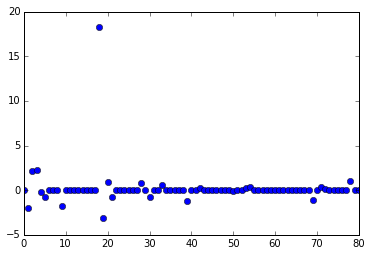

In [8]:
plot(lasso.coef_,'o')

In [9]:
s_idx=argsort(abs(lasso.coef_))
importance = featsV.columns[s_idx[::-1]]
for name,imp in zip(importance,sort(abs(lasso.coef_))[::-1]):
    print name,':',imp

WL : 18.2645746035
PL : 3.09523018852
FP : 2.29049760182
W : 2.14630861126
TEG : 2.0427267055
PJ : 1.7466427136
TL : 1.2030148363
EM3 : 1.08718786661
P4 : 1.01214762896
SIGMA : 0.937703258517
TEL : 0.784434042031
PBL : 0.748400299634
FPB : 0.733070482409
PZUR : 0.727414139122
PDWLL : 0.534424043406
SITA3 : 0.400833894475
P1 : 0.335375194842
FPA : 0.202969523976
EM1 : 0.194370971072
SB : 0.185932569841
H1 : 0.123140998779
K3 : 0.106289715106
PTDL : 0.0
K4 : 0.0
PTDR : 0.0
PTUR : 0.0
PPLT : 0.0
PZUL : 0.0
PTU : 0.0
PZDL : 0.0
PZDR : 0.0
PDWHDL : 0.0
PTUL : 0.0
PDWHLL : 0.0
PDWHDR : 0.0
PDWHRR : 0.0
PDWHUR : 0.0
PDWDL : 0.0
PDWDR : 0.0
PDWRR : 0.0
PDWUR : 0.0
PSB : 0.0
FPD : 0.0
FPC : 0.0
PDWUL : 0.0
WP : 0.0
PDWHUL : 0.0
Y3 : 0.0
EM2 : 0.0
P2 : 0.0
SITA2 : 0.0
K2 : 0.0
FRB2 : 0.0
H3 : 0.0
FI3 : 0.0
Y2 : 0.0
P3 : 0.0
FRB3 : 0.0
H4 : 0.0
Y4 : 0.0
FI4 : 0.0
EM4 : 0.0
FI2 : 0.0
H2 : 0.0
PDPLT : 0.0
SDR : 0.0
PFL : 0.0
SITA4 : 0.0
SA : 0.0
SC : 0.0
SD : 0.0
SUR : 0.0
SDL : 0.0
FRB1 : 0.0
SUL 

# use full data

In [10]:
lasso.fit(X,Y)
print 'score:',lasso.score(X,Y)

score: 0.63935867916


# random forest

In [11]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr = RFR(n_estimators=10, criterion='mse', 
          max_depth=None, min_samples_split=2, 
          min_samples_leaf=1, min_weight_fraction_leaf=0.0,
          max_features='auto', max_leaf_nodes=None, bootstrap=True,
          oob_score=False, n_jobs=1, random_state=None, verbose=0, 
          warm_start=False)
rfr.fit(X_train,Y_train)
print rfr.score(X_test,Y_test)

0.913851996922


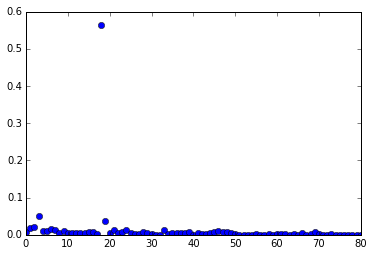

In [12]:
plot(rfr.feature_importances_,'o')

In [13]:
s_idx=argsort(rfr.feature_importances_)[::-1]
importance = featsV.columns[s_idx]
for name,imp in zip(importance,rfr.feature_importances_[s_idx]):
    print name,':',imp

WL : 0.564890265049
FP : 0.051291667649
PL : 0.0362390170782
W : 0.0204415920788
TEG : 0.0181453278033
FPC : 0.0145735008581
FPD : 0.0137232004133
PBL : 0.0137188307391
PTDL : 0.0126072145746
PDWLL : 0.011915963258
PJ : 0.0111349393367
FPB : 0.0102577387294
FPA : 0.0093808228791
SDR : 0.00933092881213
SUL : 0.00871540754106
EM3 : 0.00864719119854
TL : 0.00821297537893
SDL : 0.00810244668694
PDWHRR : 0.00793172779371
TEL : 0.00731917145909
SUR : 0.00696702234861
PDWHDR : 0.00671771829735
PTU : 0.00670477193637
TEZ : 0.0066724643773
PDWHUL : 0.00603813429002
PTDR : 0.00596156542465
SIGMA : 0.0058601161646
PSB : 0.00569314170849
PDWUR : 0.00542540485158
PTUL : 0.00511699484703
PDWRR : 0.0048920256786
PDWHLL : 0.00484408574057
PDWDL : 0.00467481083451
PDPLT : 0.00423825548608
PDWHUR : 0.0040971180433
SITA : 0.00408632673604
SD : 0.00397343115139
PFL : 0.00395634555475
PDWDR : 0.00380748811469
H3 : 0.00370771225501
SA : 0.00357374701117
PZUL : 0.0035621351499
PDWUL : 0.00331118716155
SB : 0